# Tutorial 1: Interpolation and Quadrature

### Number of points + 1 == power of polynomial

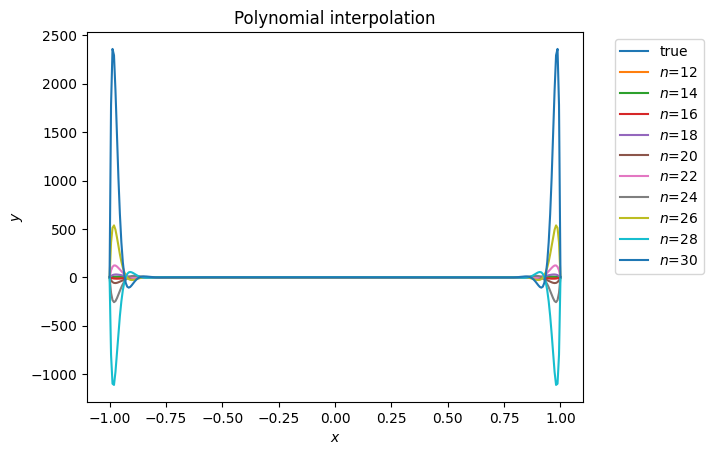

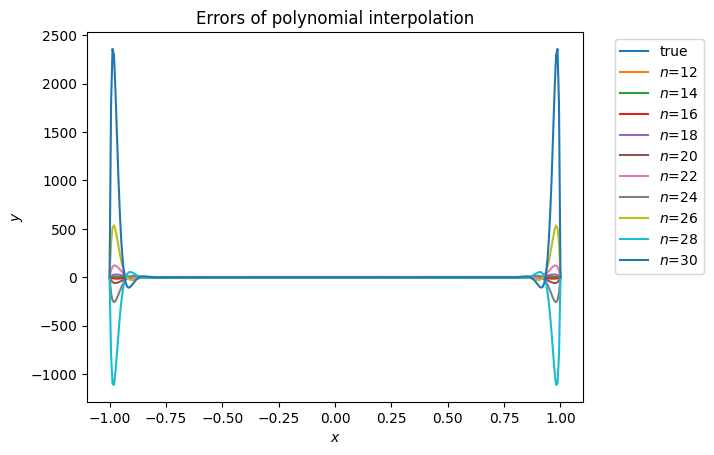

In [210]:
# investigate powers: 2-7, 8-11, 12-31
n_grid = range(12, 31, 2)


# Ground truth
plot_interpolation(f_true, label="true")

# Interpolations
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]

    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_interpolation(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation")
plt.show()


# Errors
plot_error(f_true, label=f"true")
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_error(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of polynomial interpolation")
plt.show()


#### Q: Why there are ossillations on the ends for large $n$?

## 1c. Polynomial interpolation on Chebyshev grid

In [211]:
def chebyshev_grid(n):
    k = np.arange(1, n+1)
    return np.cos((2*k-1)/(2*n) * np.pi)

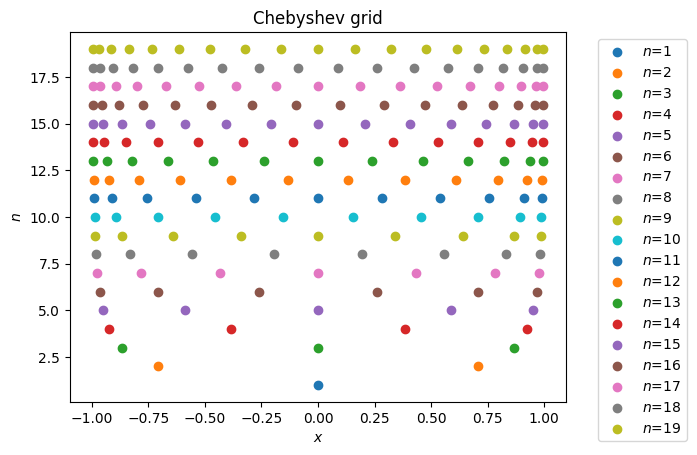

In [212]:
for n in range(1, 20):
    plt.scatter(chebyshev_grid(n), [n for _ in range(n)], label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$n$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Chebyshev grid")
plt.show()

#### See on wikipedia https://en.wikipedia.org/wiki/Chebyshev_nodes

### Lets plot interpolation

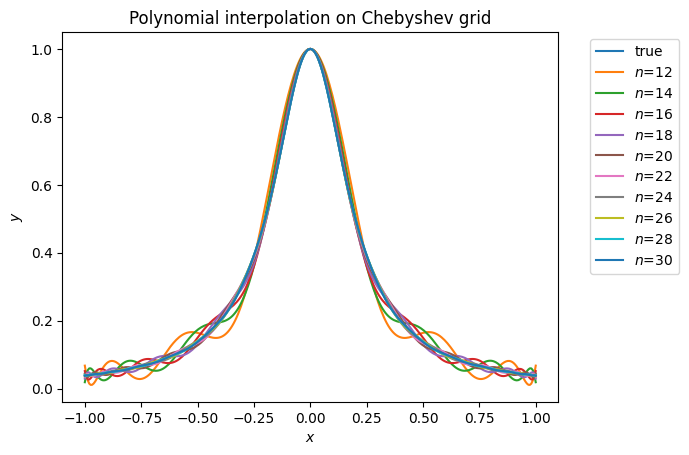

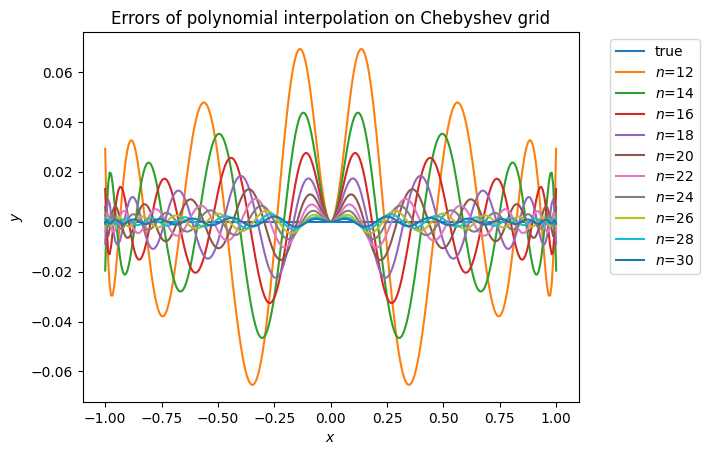

In [213]:
# investigate powers: 2-7, 8-11, 12-31
n_grid = range(12, 31, 2)


# Ground truth
plot_interpolation(f_true, label="true")

# Interpolations
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]

    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_interpolation(poly, label=f"$n$={n}")
    
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Polynomial interpolation on Chebyshev grid")
plt.show()


# Errors
plot_error(f_true, label=f"true")
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    plot_error(poly, label=f"$n$={n}")

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Errors of polynomial interpolation on Chebyshev grid")
plt.show()


/data/users/edgar.makarov/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data/users/edgar.makarov/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data/users/edgar.makarov/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data/users/edgar.makarov/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data/users/edgar.makarov/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data

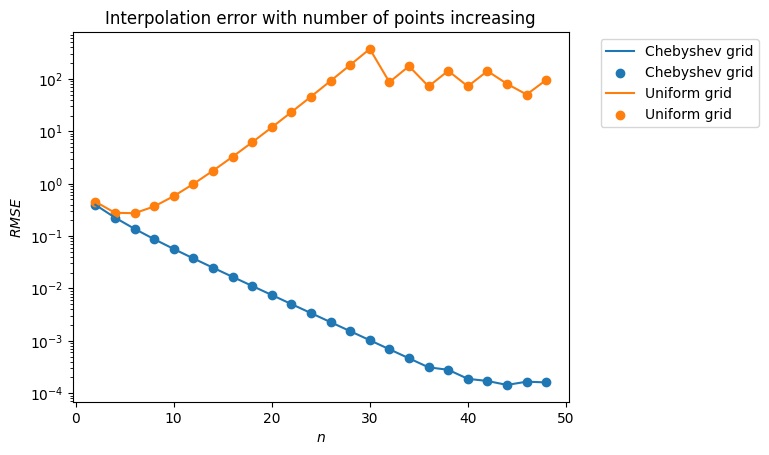

In [214]:
# play with 
n_grid = range(2, 50, 2) 

chebyshev_rmse = []
for n in n_grid:
    x_grid = chebyshev_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    chebyshev_rmse.append(RMSE(poly))

    
uniform_rmse = []
for n in n_grid:
    x_grid = uniform_grid(n+1)
    y_grid = [f_true(x) for x in x_grid]
    
    poly_coeffs = np.polyfit(x_grid, y_grid, n)
    poly = np.poly1d(poly_coeffs)
    
    uniform_rmse.append(RMSE(poly))




plt.plot(n_grid, chebyshev_rmse, label="Chebyshev grid")
plt.scatter(n_grid, chebyshev_rmse, label="Chebyshev grid")

plt.plot(n_grid, uniform_rmse, label="Uniform grid")
plt.scatter(n_grid, uniform_rmse, label="Uniform grid")

plt.yscale("log")
plt.xlabel("$n$")
plt.ylabel("$RMSE$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Interpolation error with number of points increasing")
plt.show()


#### Q: What happens when $n$ become very large (try 50, 100, 500)?  

In [215]:
0.1 + 0.2 == 0.3

False

In [216]:
0.3 - 0.2 - 0.1

-2.7755575615628914e-17

In [217]:
from decimal import Decimal

print(Decimal(0.1))
print(Decimal(0.2))
print(Decimal(0.3))

0.1000000000000000055511151231257827021181583404541015625
0.200000000000000011102230246251565404236316680908203125
0.299999999999999988897769753748434595763683319091796875


### Problem 2

The integral of $f(x)$ from the previous problem is $(2 \arctan(5))/5$. Using the interpolants from Problem 1(a), compute the integral of $f(x)$ over the interval $[-1,1]$ for different $h$ and compare with the exact answer

In [1]:
import numpy as np
import numpy.linalg as lin
import scipy
import matplotlib.pyplot as plt

In [200]:
# def uniform_grid(n):
#     return np.linspace(a, b, n)

In [201]:
def f_true(x):
    return 1/(1 + 25*x**2)

In [202]:
# f - func to integrate
# n - number of segments on [a, b]

def int_rect_left(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*i) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value

def int_rect_right(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*(i+1)) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value


def int_rect_middle(f, n):
    h = (b - a) / n
    y_grid = np.array([f(a + h*(i+0.5)) for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value


def int_trap(f, n):
    h = (b - a) / n
    y_grid = np.array([
        (f(a + h*i) + f(a + h*(i+1))) / 2
                      for i in range(0, n)])

    int_value = np.sum(y_grid * h)    
    return int_value


In [207]:
# a, b = (-1, 1)

# true_val = 2 * np.arctan(5) / 5
# true_val

In [208]:
# Try after some fun with symmetric function
a, b = (0, 1)

true_val = 2 * np.arctan(5) / 5 / 2
true_val

0.2746801533890032

In [209]:
int_methods = [
    (int_rect_left,"int_rect_left"),
    (int_rect_right,"int_rect_right"),
    (int_rect_middle,"int_rect_middle"),
    (int_trap,"int_trap"),
]

int_rect_left   E = 0.67771 * h^1.18373
int_rect_right  E = 0.27919 * h^0.70366
int_rect_middle E = 0.56569 * h^4.40841
int_trap        E = 0.65485 * h^4.34574


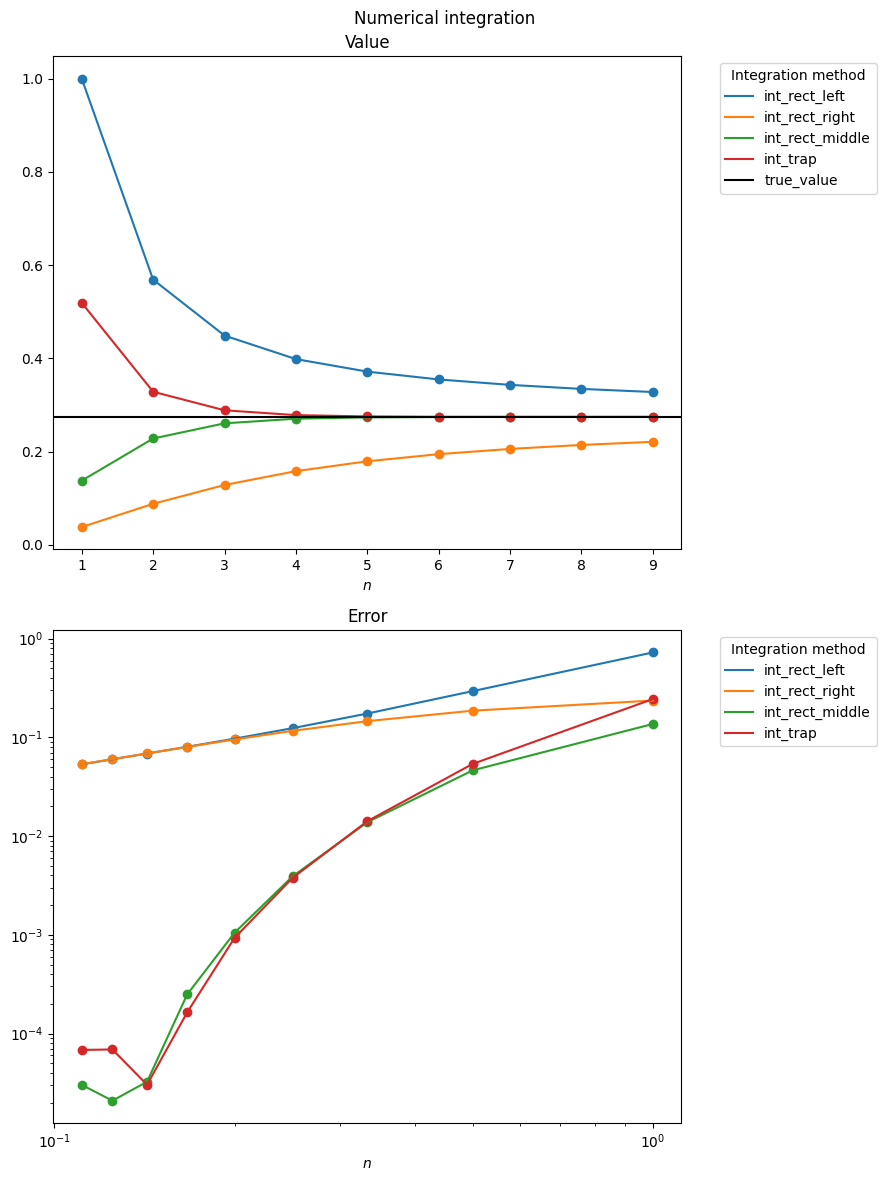

In [212]:
# Try ranges: (1, 10, 1), (1, 30, 1), (10, 30, 1), (30, 1000, 30)

n_grid = range(1, 10, 1)
h_grid = [(b-a)/n for n in n_grid]


fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 12))
axes[0].set_title("Value")
axes[1].set_title("Error")
# axes[2].set_title("Relative error")


int_method_results = {}

for int_method,label in int_methods:
    int_vals = np.array([int_method(f_true, n) for n in n_grid])
    axes[0].plot(n_grid, int_vals, label=label)
    axes[0].scatter(n_grid, int_vals)

    
    err_vals = np.abs(int_vals - true_val)
    axes[1].plot(h_grid, err_vals, label=label)
    axes[1].scatter(h_grid, err_vals)

    
#     rel_err_vals = np.abs(err_vals[:-1] / err_vals[1:] - 1)
#     axes[2].plot(h_grid[:-1], rel_err_vals, label=label)
    

    poly_coeffs = np.polyfit(np.log(h_grid), np.log(err_vals), 1)
    print(f"{label:15} E = {np.exp(poly_coeffs[1]):.5f} * h^{poly_coeffs[0]:.5f}")


axes[0].axhline(true_val, label="true_value", color="black")
axes[0].set_xlabel("$n$")


axes[1].set_yscale("log")
axes[1].set_xscale("log")
axes[1].set_xlabel("$n$")


# axes[2].set_yscale("log")
# axes[2].set_xlabel("$n$")

for axe in axes:
    axe.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Integration method")

fig.suptitle("Numerical integration")
fig.tight_layout() 
plt.show()

## Condition number dependency